In [4]:
import requests
import copy
import datetime
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/Users/rajasekhard/Downloads/CPU_usage_by_namespace.csv")


In [43]:
df['Time'] = df['Time'].astype('datetime64[ns]')
df1 = df[['Time', 'Point']]
df1 = df1[np.isfinite(df).all(1)]

In [44]:
df1.head()

,Time,Point
0,2022-01-24 04:40:00,68.83036
1,2022-01-24 04:42:00,70.84702
2,2022-01-24 04:44:00,69.15714
3,2022-01-24 04:46:00,73.17440
4,2022-01-24 04:48:00,69.53333


In [45]:
df1

,Time,Point
0,2022-01-24 04:40:00,68.83036
1,2022-01-24 04:42:00,70.84702
2,2022-01-24 04:44:00,69.15714
3,2022-01-24 04:46:00,73.17440
4,2022-01-24 04:48:00,69.53333
...,...,...
13043,2022-01-24 16:36:00,1986.15294
13044,2022-01-24 16:38:00,2113.02647
13045,2022-01-24 16:40:00,2565.56791
13046,2022-01-24 16:42:00,2073.28824


In [46]:
df1=df1.reset_index()


In [47]:
df1 = df1.rename(columns={'Point': 'y', 'Time':'ds'})

In [48]:
df1.head()

,index,ds,y
0,0,2022-01-24 04:40:00,68.83036
1,1,2022-01-24 04:42:00,70.84702
2,2,2022-01-24 04:44:00,69.15714
3,3,2022-01-24 04:46:00,73.17440
4,4,2022-01-24 04:48:00,69.53333


In [61]:
df1.replace([np.inf, -np.inf], np.nan).dropna(subset=["ds", "y"], how="all")
df1.replace([np.inf, -np.inf], np.nan)

,index,ds,y,y_orig
0,0,2022-01-24 04:40:00,1.442591,4.231645
1,1,2022-01-24 04:42:00,1.449392,4.260523
2,2,2022-01-24 04:44:00,1.443709,4.236381
3,3,2022-01-24 04:46:00,1.456950,4.292846
4,4,2022-01-24 04:48:00,1.444989,4.241806
...,...,...,...,...
13043,13043,2022-01-24 16:36:00,2.027353,7.593955
13044,13044,2022-01-24 16:38:00,2.035474,7.655877
13045,13045,2022-01-24 16:40:00,2.060505,7.849935
13046,13046,2022-01-24 16:42:00,2.032991,7.636891


In [62]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [63]:
df1['y_orig'] = df1['y']# to save a copy of the original data..we'll see why shortly. 
df1['y'] = np.log(df1['y'])

/Users/rajasekhard/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [64]:
df1.tail()

,index,ds,y,y_orig
13043,13043,2022-01-24 16:36:00,0.706731,2.027353
13044,13044,2022-01-24 16:38:00,0.710728,2.035474
13045,13045,2022-01-24 16:40:00,0.722951,2.060505
13046,13046,2022-01-24 16:42:00,0.709508,2.032991
13047,13047,2022-01-24 16:44:00,0.704079,2.021984


In [65]:
model = Prophet() #instantiate Prophet

In [66]:
model.fit(df1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
future_data = model.make_future_dataframe(periods=10, freq = 'H')
future_data.tail(15)

,ds
360,2022-01-24 16:36:00
361,2022-01-24 16:38:00
362,2022-01-24 16:40:00
363,2022-01-24 16:42:00
364,2022-01-24 16:44:00
365,2022-01-24 17:44:00
366,2022-01-24 18:44:00
367,2022-01-24 19:44:00
368,2022-01-24 20:44:00
369,2022-01-24 21:44:00


In [68]:
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
360,2022-01-24 16:36:00,0.404003,-0.012545,0.822891
361,2022-01-24 16:38:00,0.403981,-0.013581,0.846807
362,2022-01-24 16:40:00,0.403959,-0.010069,0.819784
363,2022-01-24 16:42:00,0.403937,-0.006718,0.822342
364,2022-01-24 16:44:00,0.403915,-0.000706,0.829955
365,2022-01-24 17:44:00,0.403257,-0.030836,0.819714
366,2022-01-24 18:44:00,0.402599,0.037598,0.818124
367,2022-01-24 19:44:00,0.401941,-0.021223,0.803002
368,2022-01-24 20:44:00,0.401283,-0.003668,0.833889
369,2022-01-24 21:44:00,0.400624,-0.004095,0.875990


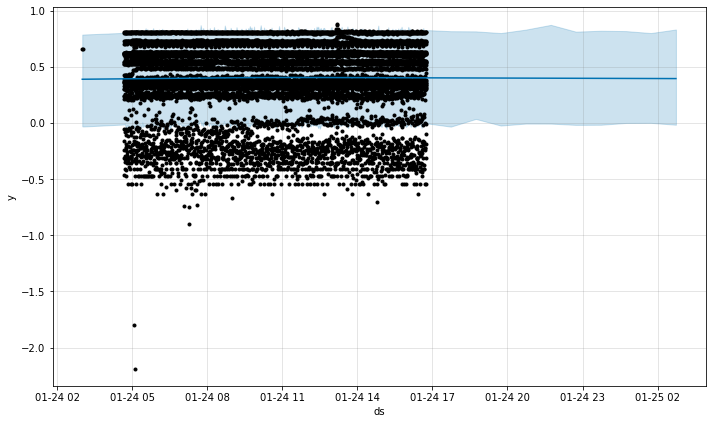

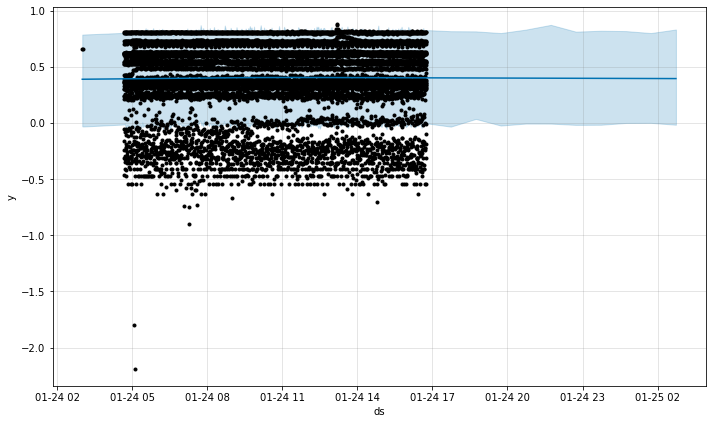

In [69]:
model.plot(forecast_data)

In [70]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

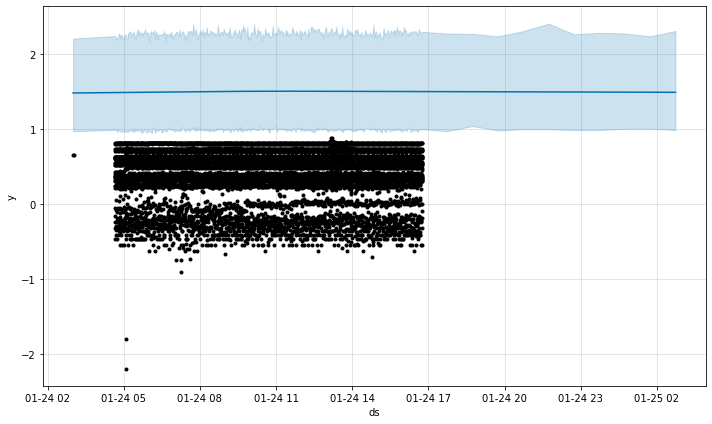

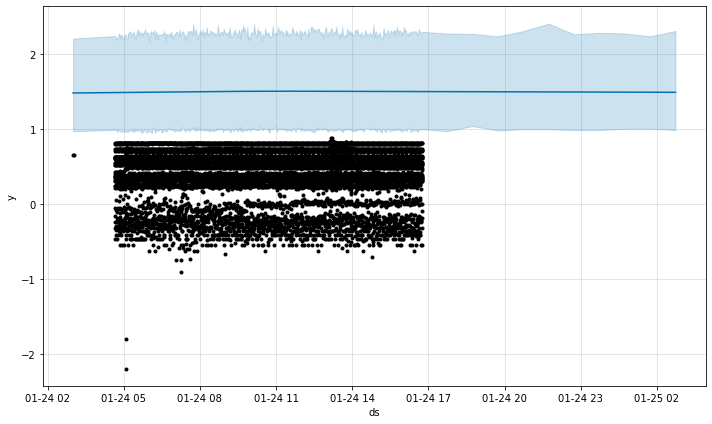

In [71]:
model.plot(forecast_data_orig)

In [72]:
df1['y_log']=df1['y'] #copy the log-transformed data to another column
df1['y']=df1['y_orig']

In [73]:
final_df = pd.DataFrame(forecast_data_orig)

In [74]:
import plotly.graph_objs as go
import plotly.offline as py

In [76]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df1["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'